In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, kstest, mannwhitneyu, ttest_ind, levene, kruskal
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, classification_report
from sklearn.utils import shuffle
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Анализ и предобработка данных

In [4]:
df = pd.read_csv('credit_scoring.csv')
df.drop('client_id', axis=1, inplace = True)

In [5]:
df['Delinquent90'] = df['Delinquent90'].astype(bool)

In [6]:
df.shape

(75000, 10)

In [7]:
df.duplicated().sum()

17

In [8]:
df = df.drop_duplicates()

In [9]:
df.isna().sum()

DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1914
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14831
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64

Пропуски в признаках "NumDependents" и "Income" 

In [10]:
df.describe()

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit
count,74983.000000,74983.000000,74983.000000,74983.000000,73069.000000,74983.000000,74983.000000,6.015200e+04,74983.000000
mean,353.340383,52.594744,8.451276,1.016924,0.756121,0.428417,0.248056,6.740171e+03,6.277619
std,2117.470748,14.867025,5.156017,1.124042,1.108180,4.276919,4.239965,1.422885e+04,267.773654
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.176160,41.300000,5.000000,0.000000,0.000000,0.000000,0.000000,3.421364e+03,0.029748
50%,0.366924,52.200000,8.000000,1.000000,0.000000,0.000000,0.000000,5.424589e+03,0.153859
75%,0.863070,63.100000,11.000000,2.000000,1.000000,0.000000,0.000000,8.291619e+03,0.560731
max,332600.272820,109.800000,56.000000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533


<Axes: xlabel='Age', ylabel='Count'>

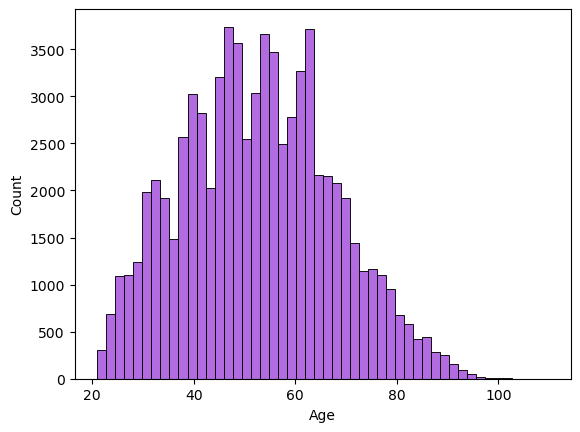

In [16]:
sns.histplot(data=df, x=factors[1], color='#9939d6', bins = 50)

In [11]:
factors = list(df.columns)

k = 0
m = 3
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(factors):
        break
    sns.histplot(ax=ax, data=df, y=factors[i], color='#9939d6')
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):  # Set x-label only for the bottom row
        ax.set_xlabel(factors[i], fontsize=12)

plt.tight_layout()
plt.show()